Name: Afdal Bouraima
student number : 2304491

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Input,Conv2D,Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def non_norm_net(activation,input_shape):
  #Construct our model
  model = Sequential()
  model.add(Input(shape=input_shape))
  model.add(Conv2D(32,(3,3),activation=activation,padding="same"))
  model.add(Conv2D(64,(3,3),activation=activation,padding="same"))
  model.add(MaxPooling2D((3,3)))
  model.add(Dropout(.5))
  model.add(Flatten())
  model.add(Dense(250,activation=activation))
  model.add(Dense(10,activation="softmax"))
  #We compile it
  model.compile(optimizer = keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
  # And we return it
  return model

def norm_net(activation,input_shape):
  #Construct our model
  model = Sequential()
  model.add(Input(shape=input_shape))
  model.add(Conv2D(32,(3,3),activation=activation,padding="same"))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3),activation=activation,padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((3,3)))
  model.add(Dropout(.5))
  model.add(Flatten())
  model.add(Dense(250,activation=activation))
  model.add(BatchNormalization())
  model.add(Dense(10,activation="softmax"))
  #We compile it
  model.compile(optimizer = keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
  # And we return it
  return model
def plot_results(history, activation_function, dataset):
    plt.figure(figsize=(12, 4))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{activation_function} Activation Function - {dataset}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{activation_function} Activation Function - {dataset}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [3]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
#We normalize the input
train_images=train_images/255
test_images=test_images/255

#We reshape it to have 60000X28X28X1
train_images = tf.reshape(train_images,(train_images.shape[0],28,28,1))
#We reshape it to have 10000X28X28X1
test_images = tf.reshape(test_images,(test_images.shape[0],28,28,1))

#Transform the labels to categorial values
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

# validation data
x_validation = train_images[-2000:,:,:,:]
y_validation = train_labels[-2000:]

train_images = train_images[:-2000,:,:,:]
train_labels = train_labels[:-2000]

In [4]:
model = non_norm_net("relu",(28,28,1))
model_norm = norm_net("relu",(28,28,1))

**We train our non batch normalized model and plot the results**

In [5]:
history = model.fit(train_images,train_labels,batch_size=128,epochs=30,validation_data=(x_validation,y_validation))

Epoch 1/30


2023-12-09 11:38:41.951772: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


454/454 [==============================] - 7s 8ms/step - loss: 0.1912 - accuracy: 0.9423 - val_loss: 0.0423 - val_accuracy: 0.9925
Epoch 2/30
454/454 [==============================] - 3s 7ms/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.0421 - val_accuracy: 0.9930
Epoch 3/30
454/454 [==============================] - 3s 7ms/step - loss: 0.0424 - accuracy: 0.9857 - val_loss: 0.0398 - val_accuracy: 0.9930
Epoch 4/30
454/454 [==============================] - 3s 7ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0354 - val_accuracy: 0.9945
Epoch 5/30
454/454 [==============================] - 3s 7ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0388 - val_accuracy: 0.9935
Epoch 6/30
454/454 [==============================] - 3s 7ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0402 - val_accuracy: 0.9950
Epoch 7/30
454/454 [==============================] - 3s 7ms/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.0467 - val_accuracy: 0.9940
Epoch 8/30
454/45

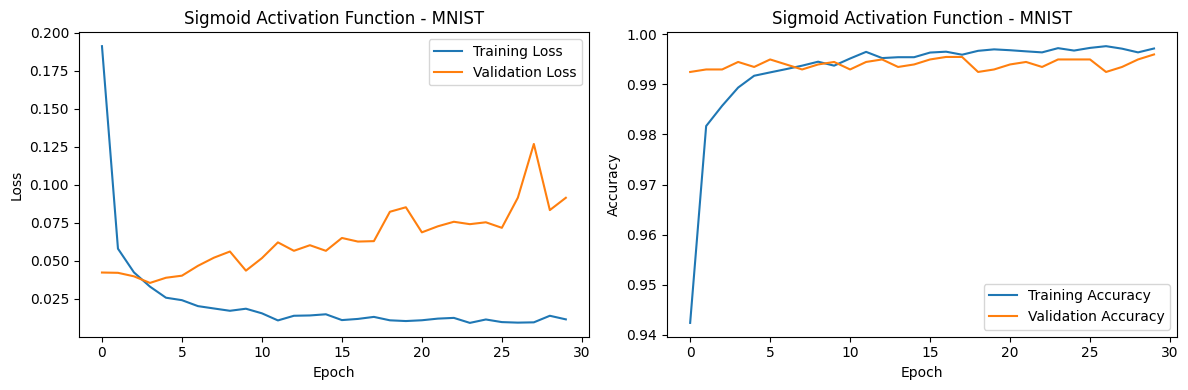

In [6]:
plot_results(history,"Sigmoid","MNIST")

**We train our batch normalized model and we plot the results**

In [7]:
history_bn = model_norm.fit(train_images,train_labels,batch_size=128,epochs=30,validation_data=(x_validation,y_validation))

Epoch 1/30


2023-12-09 11:40:18.925204: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


454/454 [==============================] - 7s 9ms/step - loss: 0.1504 - accuracy: 0.9531 - val_loss: 0.5944 - val_accuracy: 0.7865
Epoch 2/30
454/454 [==============================] - 4s 9ms/step - loss: 0.0567 - accuracy: 0.9818 - val_loss: 0.0360 - val_accuracy: 0.9920
Epoch 3/30
454/454 [==============================] - 4s 9ms/step - loss: 0.0411 - accuracy: 0.9869 - val_loss: 0.0398 - val_accuracy: 0.9905
Epoch 4/30
454/454 [==============================] - 4s 9ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0366 - val_accuracy: 0.9940
Epoch 5/30
454/454 [==============================] - 4s 9ms/step - loss: 0.0264 - accuracy: 0.9913 - val_loss: 0.0326 - val_accuracy: 0.9945
Epoch 6/30
454/454 [==============================] - 4s 9ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0356 - val_accuracy: 0.9940
Epoch 7/30
454/454 [==============================] - 4s 9ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0357 - val_accuracy: 0.9960
Epoch 8/30
454/45

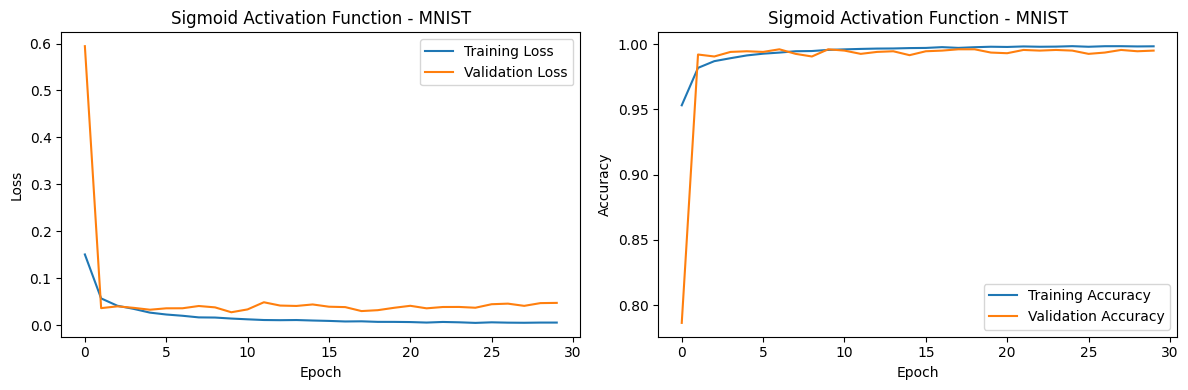

In [8]:
plot_results(history_bn,"Sigmoid","MNIST")

**With the batch normalization, the loss function converge and is smoother, the overfitting is also reduced but without there is little divergence after decreasing the cost **

In [9]:
#Error without and with batch normalization 
error_without = [1-accuracy for accuracy in history.history['accuracy']]
error_with = [1-accuracy for accuracy in history_bn.history['accuracy']]

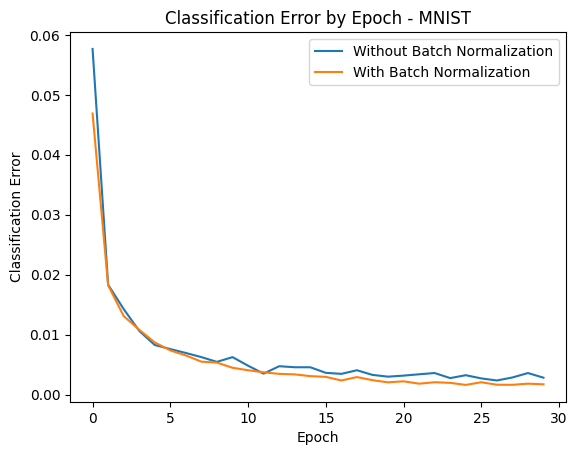

In [10]:
plt.plot(error_without,label='Without Batch Normalization')
plt.plot(error_with,label='With Batch Normalization')
plt.title('Classification Error by Epoch - MNIST')
plt.xlabel('Epoch')
plt.ylabel('Classification Error')
plt.legend()
plt.show()